<div dir="rtl" lang="fa" style="text-align: center;">
<p>
<b>
<center>
تمرین سوم پردازش زبان طبیعی<br>
نیمسال دوم<br>
گروه ۱۲<br>
</b>
</p>
</div>


In [1]:
!pip install torch transformers seqeval datasets pytorch-crf hazm


Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 272.8 kB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 1.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.1/316.1 kB 323.2 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 1.2 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 718.4 kB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Created wheel for seqeval: filename=seqeval-1.2.2-py3-none-any.whl size=16180 sha256=ef86e82152bbd23173bb1694bb7eadee4d52f417e37082c3d2782444f92c44ea
  Stored in directory: 

<div dir="rtl" lang="fa" style="text-align: center;">

1. کتابخانه `transformers` برای پردازش زبان طبیعی و مدل‌های زبانی پیشرفته به کار می‌رود.
2. **مدل انتخابی:** مدل BERT فارسی `HooshvareLab/bert-fa-zwnj-base` استفاده می‌شود.
3. تنظیمات مدل با استفاده از `AutoConfig` بارگذاری می‌شود.
4. توکنایزر مدل با استفاده از `AutoTokenizer` بارگذاری می‌شود. توکنایزر متن ورودی را به توکن‌ها تبدیل می‌کند.
5. مدل BERT با استفاده از `AutoModel` بارگذاری می‌شود. این مدل برای انجام وظایف مختلف پردازش زبان طبیعی آماده می‌شود.


In [3]:
from transformers import AutoConfig, AutoTokenizer, AutoModel, TFAutoModel

model_name_or_path = "HooshvareLab/bert-fa-zwnj-base"
config = AutoConfig.from_pretrained(model_name_or_path)
tokenizer = AutoTokenizer.from_pretrained(model_name_or_path)
model = AutoModel.from_pretrained(model_name_or_path)


Some weights of BertModel were not initialized from the model checkpoint at HooshvareLab/bert-fa-zwnj-base and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


<div dir="rtl" lang="fa" style="text-align: center;">
دانلود و آنزیپ دیتاست آرمان

In [5]:
import requests
import zipfile
import os

# Define the URL and the local filename
url = "https://drive.usercontent.google.com/u/0/uc?id=1A9L64D3V-xmVQJBJn1XEisE_66faqlNk&export=download"
local_filename = "arman_ner_dataset.zip"

# Download the file
response = requests.get(url)
with open(local_filename, 'wb') as f:
    f.write(response.content)

# Check if the file was downloaded successfully
if os.path.exists(local_filename):
    print(f"Downloaded {local_filename} successfully.")

    # Unzip the file
    with zipfile.ZipFile(local_filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("Unzipped the file successfully.")
else:
    print(f"Failed to download {local_filename}.")


Downloaded arman_ner_dataset.zip successfully.
Unzipped the file successfully.


<div dir="rtl" lang="fa" style="text-align: center;">

1. کتابخانه `keras.preprocessing.sequence`: برای پد کردن توالی‌ها.

2. دیکشنری `mapping_dict` برای مپ کردن برچسب‌های NER به مقادیر عددی.

3. تابع `read_file`برای خواندن فایل‌های متنی حاوی توکن‌ها و برچسب‌های NER می باشد.
     - فایل مشخص شده را باز می‌کند و خطوط آن را می‌خواند.
     - توکن‌ها و برچسب‌های NER را استخراج و به صورت لیست ذخیره می‌کند.
     - برچسب‌های NER را به مقادیر عددی نگاشت می‌کند.

4. تابع `create_dataset`برای ایجاد مجموعه داده‌های آموزشی، ارزیابی، و آزمایشی است.
     - برای هر بخش (آموزشی، ارزیابی، آزمایشی)، توکن‌ها و برچسب‌های NER را از فایل مربوطه می‌خواند.
     - مجموعه داده‌ها را به صورت `DatasetDict` بازمی‌گرداند.

     


In [10]:
import os
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer
from keras.preprocessing.sequence import pad_sequences

mapping_dict = {'B-event': 0, 'B-fac': 1, 'B-loc': 2, 'B-org': 3, 'B-pers': 4, 'B-pro': 5, 'I-event': 6, 'I-fac': 7, 'I-loc': 8, 'I-org': 9, 'I-pers': 10, 'I-pro': 11, 'O': 12}

def read_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        lines = file.readlines()

    tokens = []
    ner_tags = []
    current_tokens = []
    current_tags = []

    for line in lines:
        line = line.strip()
        if line == '':
            if current_tokens:
                tokens.append(current_tokens)
                ner_tags.append([mapping_dict[tag] for tag in current_tags])
                current_tokens = []
                current_tags = []
        else:
            token, tag = line.split()
            current_tokens.append(token)
            current_tags.append(tag)

    if current_tokens:
        tokens.append(current_tokens)
        ner_tags.append([mapping_dict[tag] for tag in current_tags])

    return tokens, ner_tags

def create_dataset(file_paths):
    datasets = {}
    for split, file_path in file_paths.items():
        tokens, ner_tags = read_file(file_path)
        datasets[split] = Dataset.from_dict({"tokens": tokens, "ner_tags": ner_tags})
    return DatasetDict(datasets)

file_paths = {
    "train": "./arman/train.txt",
    "dev": "./arman/dev.txt",
    "test": "./arman/test.txt"
}

raw_datasets = create_dataset(file_paths)


2024-07-12 23:06:36.066654: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-12 23:06:36.076692: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-12 23:06:36.088657: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-12 23:06:36.092176: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-12 23:06:36.102110: I tensorflow/core/platform/cpu_feature_guar

In [11]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 10241
    })
    dev: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 5121
    })
    test: Dataset({
        features: ['tokens', 'ner_tags'],
        num_rows: 7681
    })
})

<div dir="rtl" lang="fa" style="text-align: center;">
در این قسمت جملات و برچسب‌های NER را از دیتاست گرفته، آن‌ها را توکنایز کرده و برچسب‌های توکن‌ها را حفظ می‌کند. سپس داده‌ها را به شکلی پد و پردازش می‌کند که برای ورودی به مدل‌های پردازش زبان طبیعی در PyTorch آماده باشد. این مراحل شامل تبدیل جملات به توکن‌ها، نگاشت برچسب‌ها به مقادیر عددی، و ایجاد ماسک‌های توجه است.

1. تابع `tokenize_and_preserve_labels`برای توکنایز کردن جملات و نگه داشتن برچسب‌های اصلی.
     - هر کلمه در جمله را با استفاده از `tokenizer` به زیرکلمات تبدیل می‌کند.
     - برچسب مربوط به هر کلمه را به همان تعداد زیرکلمات تکرار می‌کند.
     - جملات توکنایز شده و برچسب‌ها را بازمی‌گرداند.

3. تابع `preprocess_dataset`برای  پیش‌پردازش دیتاست برای استفاده در مدل.
     - جملات و برچسب‌ها را از دیتاست استخراج می‌کند.
     - برچسب‌ها را به نام‌های اصلی تبدیل می‌کند.
     - جملات و برچسب‌ها را توکنایز و نگهداری می‌کند.
     - توکن‌ها و برچسب‌ها را پد می‌کند تا طول آن‌ها یکسان شود.
     - ماسک توجه (attention mask) را برای توالی‌ها ایجاد می‌کند.
     - ورودی‌های توکنایز شده، برچسب‌های پد شده، و ماسک‌های توجه را بازمی‌گرداند.



In [12]:
from sklearn.preprocessing import LabelEncoder
from torch.utils.data import DataLoader, TensorDataset, RandomSampler, SequentialSampler
import torch
import itertools

def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        tokenized_sentence.extend(tokenized_word)
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels


def preprocess_dataset(dataset, max_len = 128):
    sentences = dataset['tokens']
    tags = dataset['ner_tags']

    tags = [label_encoder.inverse_transform(tag_seq) for tag_seq in tags]

    tokenized_texts_and_labels = [
        tokenize_and_preserve_labels(sent, labs)
        for sent, labs in zip(sentences, tags)
    ]

    tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
    labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

    input_ids_padded = pad_sequences([tokenizer.convert_tokens_to_ids(text) for text in tokenized_texts],
                                     maxlen=max_len, dtype="long", value=0.0, truncating="post", padding="post")

    labels_padded = pad_sequences([[tag2idx.get(label) for label in label_sequence] for label_sequence in labels],
                                  maxlen=max_len, value=tag2idx["PAD"], padding="post",
                                  dtype="long", truncating="post")

    attention_masks = [[float(token_id != 0.0) for token_id in sequence] for sequence in input_ids_padded]

    return input_ids_padded, labels_padded, attention_masks


<div dir="rtl" lang="fa" style="text-align: center;">
در این قسمت، مجموعه داده‌های آموزشی، ارزیابی و تست برای مدل پردازش زبان طبیعی آماده می‌شوند. ابتدا برچسب‌های NER به مقادیر عددی تبدیل شده و سپس نگاشت برچسب‌ها به اندیس‌ها انجام می‌گیرد تا برای ورودی به مدل‌های پردازش زبان طبیعی در PyTorch آماده باشند. 

1. از `LabelEncoder` برای تبدیل برچسب‌ها به مقادیر عددی استفاده می‌شود.

2. `LabelEncoder` با برچسب‌های ترکیبی آموزش داده می‌شود تا تمامی برچسب‌ها به طور یکنواخت و سازگار به مقادیر عددی نگاشت شوند.

3. - برچسب‌های یکتا از مجموعه داده‌ها استخراج و به نام‌های اصلی تبدیل می‌شوند.
   - برچسب "PAD" به لیست برچسب‌ها اضافه می‌شود.

این مراحل تضمین می‌کند که تمامی برچسب‌ها به طور یکنواخت و سازگار در مدل پردازش شوند و داده‌ها برای ورودی به مدل‌های پردازش زبان طبیعی در PyTorch آماده باشند.

In [13]:
train_dataset = raw_datasets['train']
valid_dataset = raw_datasets['dev']
test_dataset = raw_datasets['test']

label_encoder = LabelEncoder()
flattened_tags = list(itertools.chain.from_iterable(train_dataset['ner_tags'] + valid_dataset['ner_tags'] + test_dataset['ner_tags']))
label_encoder.fit(flattened_tags)

flattened_tags = list(itertools.chain(*train_dataset['ner_tags'], *valid_dataset['ner_tags'], *test_dataset['ner_tags']))
unique_tag_values = list(set(flattened_tags))
unique_tag_values = label_encoder.inverse_transform(unique_tag_values).tolist()
unique_tag_values.append("PAD")

tag2idx = {tag: index for index, tag in enumerate(unique_tag_values)}


<div dir="rtl" lang="fa" style="text-align: center;">
در این بخش، داده‌های آموزشی، ارزیابی و تست پیش‌پردازش شده و برای استفاده در مدل‌های PyTorch آماده می‌شوند. این مراحل شامل تبدیل داده‌ها به Tensor، و ایجاد DataLoaderها برای بارگذاری داده‌ها در مدل به صورت Batch می‌باشد.

1.    - جملات و برچسب‌ها از مجموعه داده‌ها استخراج و پیش‌پردازش می‌شوند تا ورودی‌های توکنایز شده، برچسب‌های پد شده، و ماسک‌های توجه ایجاد شوند.
   - این عملیات برای هر یک از مجموعه داده‌های آموزشی، ارزیابی و آزمایشی انجام می‌شود.

2. - داده‌های پیش‌پردازش شده به Tensorهای PyTorch تبدیل می‌شوند تا بتوانند در مدل‌های PyTorch استفاده شوند.
   - داده‌های آموزشی، ارزیابی و تست به Tensorهای ورودی، برچسب‌ها و ماسک‌های توجه تبدیل می‌شوند.

3.- TensorDatasetها و DataLoaderها برای هر یک از مجموعه داده‌های آموزشی، ارزیابی و آزمایشی ایجاد می‌شوند.
   - DataLoaderها به صورت Batch داده‌ها را بارگذاری می‌کنند تا بهینه‌سازی پردازش مدل افزایش یابد.

In [14]:
train_inputs_padded, train_labels_padded, train_attention_masks = preprocess_dataset(train_dataset)
valid_inputs_padded, valid_labels_padded, valid_attention_masks = preprocess_dataset(valid_dataset)
test_inputs_padded, test_labels_padded, test_attention_masks = preprocess_dataset(test_dataset)

train_inputs = torch.tensor(train_inputs_padded)
train_tags = torch.tensor(train_labels_padded)
train_masks = torch.tensor(train_attention_masks)

valid_inputs = torch.tensor(valid_inputs_padded)
valid_tags = torch.tensor(valid_labels_padded)
valid_masks = torch.tensor(valid_attention_masks)

test_inputs = torch.tensor(test_inputs_padded)
test_tags = torch.tensor(test_labels_padded)
test_masks = torch.tensor(test_attention_masks)

# Create DataLoaders
train_data = TensorDataset(train_inputs, train_masks, train_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=32)

valid_data = TensorDataset(valid_inputs, valid_masks, valid_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=32)

test_data = TensorDataset(test_inputs, test_masks, test_tags)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=32)


In [15]:
tag2idx

{0: 0,
 1: 1,
 2: 2,
 3: 3,
 4: 4,
 5: 5,
 6: 6,
 7: 7,
 8: 8,
 9: 9,
 10: 10,
 11: 11,
 12: 12,
 'PAD': 13}

In [16]:
print(f"Number of training samples: {len(train_data)}")
print(f"Number of validation samples: {len(valid_data)}")
print(f"Number of test samples: {len(test_data)}")

Number of training samples: 10241
Number of validation samples: 5121
Number of test samples: 7681


<div dir="rtl" lang="fa" style="text-align: center;">
در این بخش، طول حداکثری جملات در مجموعه داده‌های آموزشی، ارزیابی و تست محاسبه می‌شود تا برای تنظیم طول توالی‌ها در مراحل بعدی پردازش استفاده شود.

- تابع `find_max_sentence_length`برای  پیدا کردن طول حداکثری جملات در یک مجموعه داده.
   - هدفش مرور و محاسبه طول هر جمله، سپس بازگرداندن طول حداکثری.


In [17]:
def find_max_sentence_length(dataset):
    max_length = 0
    for tokens in dataset['tokens']:
        max_length = max(max_length, len(tokens))
    return max_length

max_length_train = find_max_sentence_length(train_dataset)
max_length_valid = find_max_sentence_length(valid_dataset)
max_length_test = find_max_sentence_length(test_dataset)

max_length = max(max_length_train, max_length_valid, max_length_test)

print(f"Maximum sentence length in train dataset: {max_length_train}")
print(f"Maximum sentence length in valid dataset: {max_length_valid}")
print(f"Maximum sentence length in test dataset: {max_length_test}")
print(f"Overall maximum sentence length: {max_length}")


Maximum sentence length in train dataset: 240
Maximum sentence length in valid dataset: 240
Maximum sentence length in test dataset: 240
Overall maximum sentence length: 240


<div dir="rtl" lang="fa" style="text-align: center;">
در این بخش، طول جملات در مجموعه داده‌های آموزشی، ارزیابی و تست استخراج و تحلیل می‌شود. نموداری برای نمایش توزیع طول جملات در هر مجموعه داده ترسیم می‌گردد.

   - نمودار هیستوگرام برای طول جملات در هر مجموعه داده ترسیم می‌شود.
   - نمودار شامل محورهای طول جملات و تعداد جملات می‌باشد.
   - سه مجموعه داده آموزشی، ارزیابی و آزمایشی با رنگ‌های مختلف نمایش داده می‌شوند.


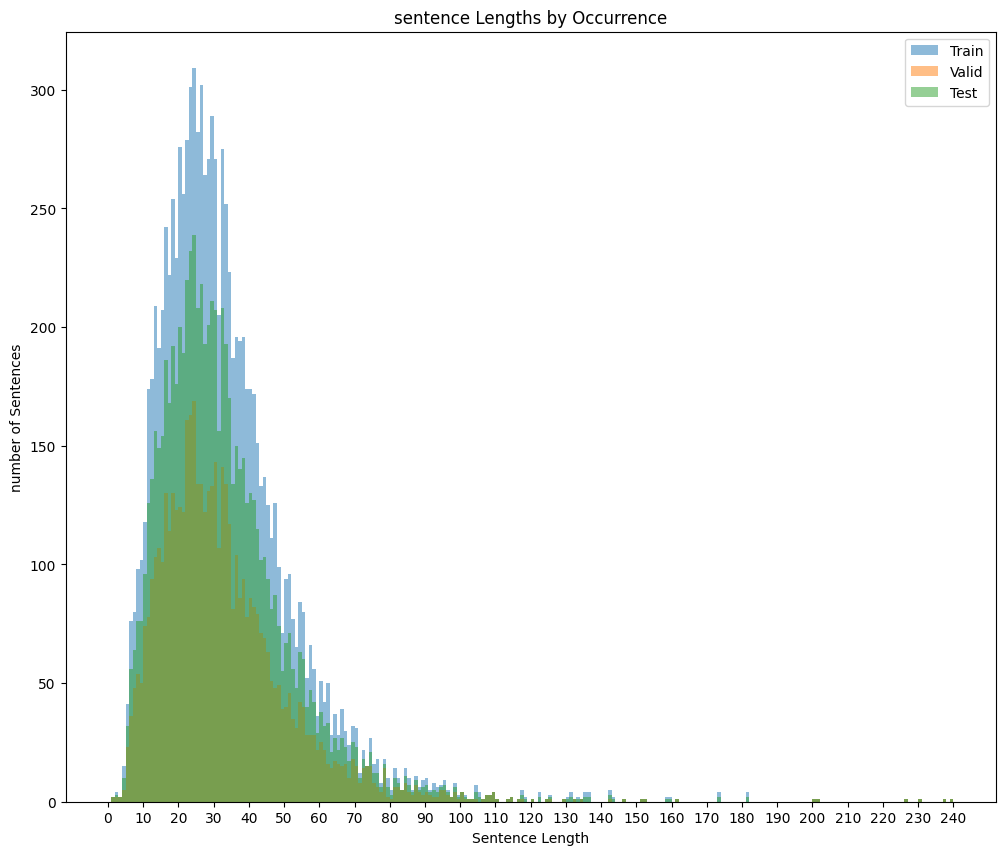

In [18]:
import matplotlib.pyplot as plt

def get_sentence_lengths(dataset):
    return [len(tokens) for tokens in dataset['tokens']]

train_lengths = get_sentence_lengths(train_dataset)
valid_lengths = get_sentence_lengths(valid_dataset)
test_lengths = get_sentence_lengths(test_dataset)

plt.figure(figsize=(12, 10))

bins = range(0, max(max(train_lengths), max(valid_lengths), max(test_lengths)) + 1, 1)

plt.hist(train_lengths, bins=bins, alpha=0.5, label='Train')
plt.hist(valid_lengths, bins=bins, alpha=0.5, label='Valid')
plt.hist(test_lengths, bins=bins, alpha=0.5, label='Test')
plt.xlabel('Sentence Length')
plt.ylabel('number of Sentences')
plt.title('sentence Lengths by Occurrence')
plt.legend(loc='upper right')
plt.xticks(range(0, max(max(train_lengths), max(valid_lengths), max(test_lengths)) + 1, 10))
plt.show()


<div dir="rtl" lang="fa" style="text-align: center;">
در این بخش، یک مدل ترکیبی شامل LSTM و CRF برای برچسب‌گذاری توالی‌ها تعریف شده است. این مدل از لایه‌های تعبیه‌سازی، LSTM دوطرفه و CRF برای پیش‌بینی برچسب‌های توالی‌ها استفاده می‌کند.

1. کلاس `Embedding_LSTM_CRF`برای ایجاد یک مدل ترکیبی از LSTM و CRF برای برچسب‌گذاری توالی‌ها.
   - مدل شامل لایه‌های تعبیه‌سازی (Embedding)، LSTM دوطرفه (Bidirectional LSTM)، لایه خطی (Linear Layer) و CRF است.

2. - در متد فوروارد تعریف عملیات پیش‌رو (Forward Pass) مدل را داریم.
     - **Embedding:** تبدیل توکن‌های ورودی به بردارهای تعبیه‌سازی.
     - **LSTM:** پردازش بردارهای تعبیه‌سازی با LSTM دوطرفه.
     - **Linear Layer:** تبدیل خروجی LSTM به امتیازهای برچسب‌ها.
     - **CRF:** محاسبه توالی برچسب‌های بهینه یا محاسبه خسارت (در صورت موجود بودن برچسب‌ها).

In [19]:
import torch
import torch.nn as nn
from transformers import BertModel
from torchcrf import CRF

class Embedding_LSTM_CRF(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim, tagset_size):
        super(Embedding_LSTM_CRF, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim * 2, tagset_size)
        self.crf = CRF(tagset_size, batch_first=True)

    def forward(self, input_ids, attention_mask, tags=None):
        embeds = self.embedding(input_ids)
        lstm_out, _ = self.lstm(embeds)
        emissions = self.hidden2tag(lstm_out)

        if tags is not None:
            loss = -self.crf(emissions, tags, mask=attention_mask.byte(), reduction='mean')
            return loss
        else:
            return self.crf.decode(emissions, mask=attention_mask.byte())


In [20]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

vocab_size = tokenizer.vocab_size
embedding_dim = 128
hidden_dim = 256
tagset_size = len(tag2idx)

model = Embedding_LSTM_CRF(vocab_size, embedding_dim, hidden_dim, tagset_size)
model.to(device)

Embedding_LSTM_CRF(
  (embedding): Embedding(42000, 128)
  (lstm): LSTM(128, 256, batch_first=True, bidirectional=True)
  (hidden2tag): Linear(in_features=512, out_features=14, bias=True)
  (crf): CRF(num_tags=14)
)

<div dir="rtl" lang="fa" style="text-align: center;">
در این بخش، مدل `Embedding_LSTM_CRF` آموزش داده شده و عملکرد آن ارزیابی می‌شود. این مراحل شامل آموزش مدل، ارزیابی عملکرد و محاسبه معیارهای ارزیابی است.

- بهینه‌سازی وزن‌های مدل با استفاده از Adam.

این بخش از کد، فرآیند آموزش و ارزیابی مدل `Embedding_LSTM_CRF` را به تفصیل انجام می‌شود. مدل با استفاده از مجموعه داده‌های آموزشی آموزش داده شده و عملکرد آن با استفاده از مجموعه داده‌های ارزیابی سنجیده می‌شود. معیارهای ارزیابی شامل دقت، یادآوری، F1 (ماکرو و میکرو) و دقت محاسبه و گزارش می‌شوند.

In [21]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import numpy as np

def evaluate(model, dataloader):
    model.eval()
    predictions, true_labels = [], []

    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            logits = model(input_ids, attention_mask)

        predictions.extend(logits)
        true_labels.extend(labels.cpu().numpy())

    return predictions, true_labels

def calculate_metrics(predictions, true_labels, tag2idx):
    idx2tag = {idx: tag for tag, idx in tag2idx.items()}

    true_tags = [idx2tag[idx] for seq in true_labels for idx in seq if idx != tag2idx["PAD"]]
    pred_tags = [idx2tag[idx] for seq in predictions for idx in seq if idx != tag2idx["PAD"]]

    precision = precision_score(true_tags, pred_tags, average='macro')
    recall = recall_score(true_tags, pred_tags, average='macro')
    f1_macro = f1_score(true_tags, pred_tags, average='macro')
    f1_micro = f1_score(true_tags, pred_tags, average='micro')
    accuracy = accuracy_score(true_tags, pred_tags)

    return precision, recall, f1_macro, f1_micro, accuracy


optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

def train(model, dataloader, optimizer):
    model.train()
    total_loss = 0

    for batch in dataloader:
        input_ids, attention_mask, labels = batch
        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        model.zero_grad()

        loss = model(input_ids, attention_mask, labels)
        total_loss += loss.item()

        loss.backward()
        optimizer.step()

    avg_loss = total_loss / len(dataloader)
    return avg_loss

num_epochs = 10

for epoch in range(num_epochs):
    train_loss = train(model, train_dataloader, optimizer)

    predictions, true_labels = evaluate(model, valid_dataloader)
    precision, recall, f1_macro, f1_micro, accuracy = calculate_metrics(predictions, true_labels, tag2idx)

    print(f"Epoch {epoch + 1}")
    print(f"Train loss: {train_loss}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Macro: {f1_macro}")
    print(f"F1 Micro: {f1_micro}")
    print(f"Accuracy: {accuracy}")

/home/fateme/.local/lib/python3.10/site-packages/torchcrf/__init__.py:249: UserWarning: where received a uint8 condition tensor. This behavior is deprecated and will be removed in a future version of PyTorch. Use a boolean condition instead. (Triggered internally at ../aten/src/ATen/native/TensorCompare.cpp:530.)
  score = torch.where(mask[i].unsqueeze(1), next_score, score)


Epoch 1
Train loss: 17.313221497699107
Precision: 0.7167608833113067
Recall: 0.3518065111811267
F1 Macro: 0.40367167671241266
F1 Micro: 0.9279574251353851
Accuracy: 0.9279574251353851
Epoch 2
Train loss: 7.348701756319896
Precision: 0.832000707298233
Recall: 0.5756734648657071
F1 Macro: 0.6632001273228046
F1 Micro: 0.9530543515544607
Accuracy: 0.9530543515544607
Epoch 3
Train loss: 4.261067459516436
Precision: 0.8809135079821208
Recall: 0.7148784788025009
F1 Macro: 0.7777828160218493
F1 Micro: 0.9697215379338302
Accuracy: 0.9697215379338302
Epoch 4
Train loss: 2.6098052586350486
Precision: 0.9182369569421737
Recall: 0.8351139232099337
F1 Macro: 0.8718479268637276
F1 Micro: 0.9813631024769507
Accuracy: 0.9813631024769507
Epoch 5
Train loss: 1.6314142916432794
Precision: 0.9265709108296812
Recall: 0.9205835175882073
F1 Macro: 0.9228251215477152
F1 Micro: 0.9889301194299791
Accuracy: 0.9889301194299791
Epoch 6
Train loss: 0.9629945008554192
Precision: 0.9696244860191373
Recall: 0.95573779